In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Задача 1

In [2]:
def simple_iteration(f, x0, eps=1e-5, maxiter=100):
    points = []
    err = []
    x_old = x0
    nit = 0
    while True:
      nit += 1
      x = f(x_old)
      
      err.append(np.abs(x - x_old))
      if np.abs(x - x_old) < eps or nit > maxiter:
        break
      x_old = x
  
    return err, nit

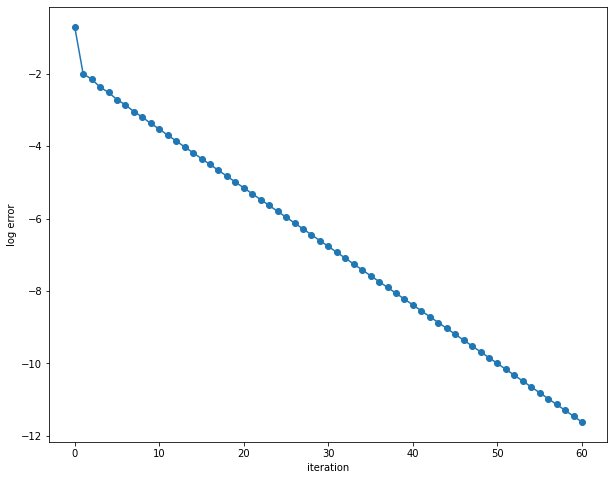

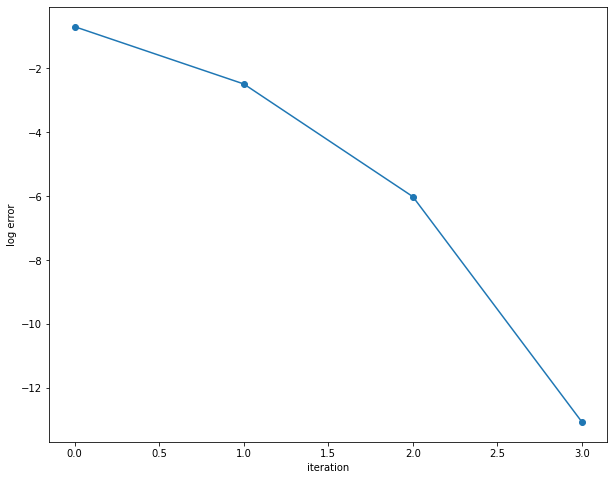

In [3]:
x0 = 1
for f in [lambda x: x + (np.cos(x + 1)) / np.sin(x),
          lambda x: (x + 2 / x) / 2]:
  err, nit = simple_iteration(f, x0=x0)

  plt.figure(figsize=(10, 8))
  plt.plot(np.log(err), '-o')
  plt.xlabel('iteration')
  plt.ylabel('log error')
  plt.show()

  print()

# Задача 2

In [4]:
%%latex
$\displaystyle

A x = b \\

A = D + (A - D) \\

x = D^{-1} (D - A) x + D^{-1} b \\

x_{n + 1} = B x_{n} + c \\

B = D^{-1} (D - A) \text{ and } c = D^{-1} b
$

<IPython.core.display.Latex object>

In [5]:
rnd = np.random.RandomState(1234)
n = 10
A = rnd.uniform(size=(n, n)) + np.diag([15]*n)
b = rnd.uniform(size=n)

In [6]:
diag = np.diag(A)

D = np.diag(diag)
D_inv = np.diag(1 / diag)

B = D_inv @ (D - A)

B_2_norm = np.linalg.norm(B, ord=2)
print('2-норма матрицы B:', B_2_norm)

B_inf_norm = np.linalg.norm(B, ord=float('inf'))
print('inf-норма матрицы B:', B_inf_norm)

2-норма матрицы B: 0.31853784252598116
inf-норма матрицы B: 0.3969558732098327


In [7]:
def jacobi_iter(A, b, x0, eps=1e-5, maxiter=100):
  diag = np.diag(A)
  D = np.diag(diag)
  D_inv = np.diag(1 / diag)
  
  B = D_inv @ (D - A)
  c = D_inv @ b
  
  x_old = x0
  nit = 0
  while True:
    nit += 1
    x = B @ x_old + c
    if np.linalg.norm(x - x0) < eps or nit > maxiter:
      break
    x_old = x
  
  return x, nit

In [8]:
x0 = np.random.rand(n)
x, nit = jacobi_iter(A, b, x0)
print(np.abs(A @ x - b))

[1.11022302e-16 0.00000000e+00 2.22044605e-16 1.11022302e-16
 1.11022302e-16 0.00000000e+00 2.42861287e-17 0.00000000e+00
 2.77555756e-17 1.11022302e-16]


In [9]:
fixed_A = rnd.uniform(size=(n, n))
b = rnd.uniform(size=n)
for i in [8, 6, 4, 2, 0]:
  print("i =", i)
  A = fixed_A + np.diag([i]*n)
  x, niter = jacobi_iter(A, b, x0)
  
  x, nit = jacobi_iter(A, b, x0)
  print(np.abs(A @ x - b))


  diag = np.diag(A)
  D = np.diag(diag)
  D_inv = np.diag(1 / diag)
  B = D_inv @ (D - A)

  B_2_norm = np.linalg.norm(B, ord=2)
  print('2-норма матрицы B:', B_2_norm)

  B_inf_norm = np.linalg.norm(B, ord=float('inf'))
  print('inf-норма матрицы B:', B_inf_norm)

  print()

i = 8
[0.00000000e+00 0.00000000e+00 0.00000000e+00 1.11022302e-16
 0.00000000e+00 0.00000000e+00 5.55111512e-17 5.55111512e-17
 0.00000000e+00 0.00000000e+00]
2-норма матрицы B: 0.5697688046353119
inf-норма матрицы B: 0.7479530659336356

i = 6
[2.67841305e-15 1.88737914e-15 2.10942375e-15 1.99840144e-15
 3.21964677e-15 3.55271368e-15 2.99760217e-15 2.22044605e-15
 2.27595720e-15 2.99760217e-15]
2-норма матрицы B: 0.7423640098411403
inf-норма матрицы B: 0.967335845904741

i = 4
[14.50314517 10.56797903 11.14378223 11.19859615 17.44859718 19.08135326
 15.91665191 12.28483821 12.42752364 16.2361684 ]
2-норма матрицы B: 1.0655391230114888
inf-норма матрицы B: 1.368828008207876

i = 2
[1.28851091e+26 9.45734304e+25 1.00790291e+26 9.91460633e+25
 1.56316105e+26 1.69978655e+26 1.41450704e+26 1.09883650e+26
 1.12824123e+26 1.43372764e+26]
2-норма матрицы B: 1.893126420427374
inf-норма матрицы B: 2.407943122845399

i = 0
[5.29889833e+94 4.16921061e+94 4.87809758e+94 4.04886615e+94
 7.06165405e

# Задача 3

In [10]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=100):
  nit = 0
  x_old = x0
  while True:
    nit += 1
    x = x_old - f(x_old) / fder(x_old)
    if np.abs(x - x_old) < eps or nit > maxiter:
      break
    x_old = x

  return x, nit

In [11]:
def nf(x):
  return 1 + np.exp(-3 * (x - 5)**2)

n = 200
h = 10 / n
X = np.linspace(0, 10, num=n)
phi = np.zeros(n)

In [12]:
def G(X, phi, h):
    n = phi.shape[0] - 2
    g = np.empty(n)
    for i in range(1, n + 1):
        g[i - 1] = (phi[i+1] - 2*phi[i] + phi[i-1])/h**2 - np.exp(phi[i]) + nf(X[i]) 
    return g

In [13]:
def J(phi, h):
    n = phi.shape[0] - 2
    j = np.zeros((n, n))
    for i in range(1, n - 1): 
        j[i, i - 1] = 1/h**2
        j[i, i] = -2/h**2 - np.exp(phi[i + 1])
        j[i, i + 1] = 1/h**2

    j[0][0] = -2/h**2 - np.exp(phi[1])
    j[0][1] = 1/h**2
    j[n-1][n-2] = 1/h**2
    j[n-1][n-1] = -2/h**2 - np.exp(phi[n])
    return j

In [14]:
def newton_iteration(phi, h, eps=1e-5, maxiter=100):
    n = phi.shape[0]
    epsilons = np.zeros(n-2)
    nit = 0
    while True:
      nit += 1
      
      j = J(phi, h)
      g = -G(X, phi, h)
      epsilons = np.linalg.solve(j, g)
      phi[1:n-1] += epsilons
      if np.linalg.norm(epsilons) < eps or nit > maxiter:
        break
        
    return phi, nit

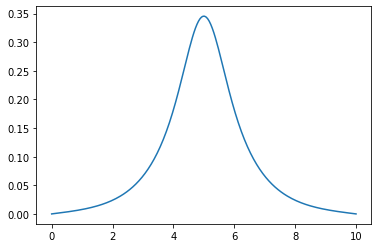

In [15]:
phi = np.zeros(n)
x, it = newton_iteration(phi, h, eps=1e-10)
plt.plot(X, x)

# Задача 4

In [16]:
def f(x):
  return x**3 - 1

def fder(x):
  return 3 * x**2

In [17]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=100):
  nit = 0
  x = x0
  while True:
    nit += 1
    if nit > maxiter:
      return None

    fx = f(x)
    fderx = fder(x)

    if np.abs(fx) < eps:
        return x

    if fderx == 0:
        return None

    x -= fx / fderx

In [18]:
A = [[], [], []]
a = [0, 0, 0] 
for k in range(3):
  a[k] = np.exp(1j * 2 * np.pi * k/3)
  print(a[k])

(1+0j)
(-0.4999999999999998+0.8660254037844387j)
(-0.5000000000000004-0.8660254037844384j)


In [19]:
eps = 10e-5
for re in np.linspace(-3, 3, num=200):
  for im in np.linspace(-3, 3, num=200):
    x = re + 1j * im

    conv = newton_iteration(f, fder, x)
    
    if conv is not None:
      for i, ai in enumerate(a):
        if abs(conv - ai) < eps:
            A[i].append(x)

In [20]:
x = []
y = []

for Ai in A:
    x.append([p.real for p in Ai])
    y.append([p.imag for p in Ai])

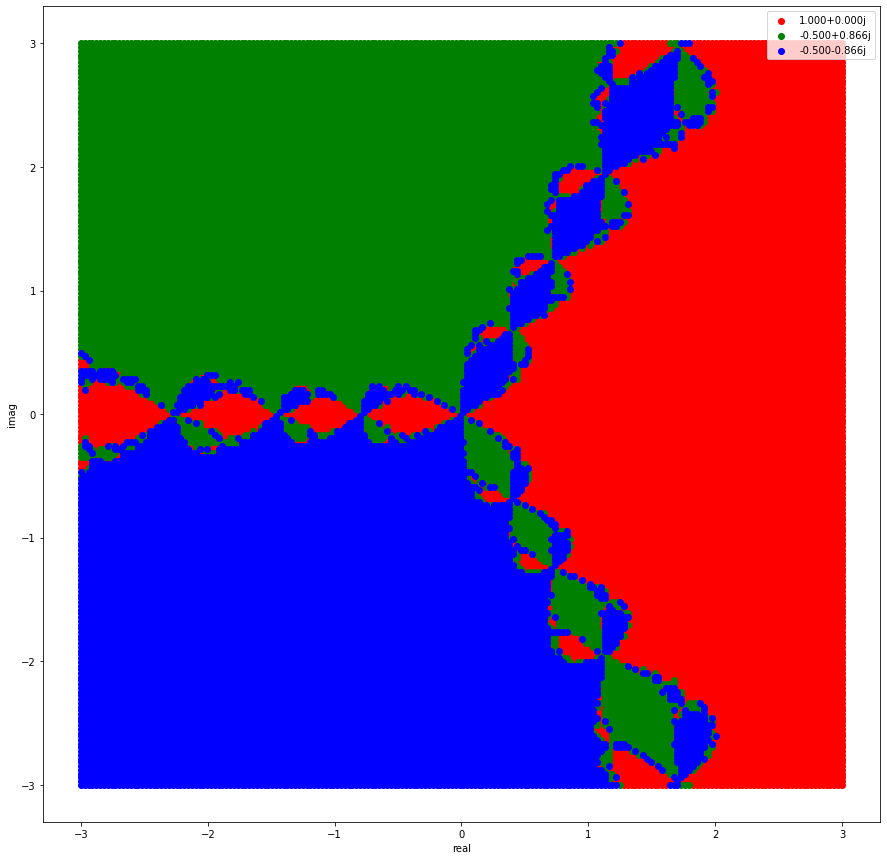

In [23]:
plt.figure(figsize = (15, 15))

colors = ['red', 'green', 'blue']

for i in range(3):
    plt.scatter(x[i], y[i],
                c=colors[i],
                label='{num.real:0.03f}{num.imag:+0.03f}j'.format(num=a[i]))

plt.xlabel('real')
plt.ylabel('imag')
plt.legend()
plt.show()